In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras

In [3]:
# from keras.datasets import digit_mnist

In [4]:
digit_mnist=keras.datasets.mnist

In [5]:
digit_mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [6]:
help(digit_mnist)

Help on package keras.api._v2.keras.datasets.mnist in keras.api._v2.keras.datasets:

NAME
    keras.api._v2.keras.datasets.mnist - AUTOGENERATED. DO NOT EDIT.

PACKAGE CONTENTS


FILE
    c:\users\dell\appdata\local\programs\python\python311\lib\site-packages\keras\api\_v2\keras\datasets\mnist\__init__.py




In [7]:
(x_train_full,y_train_full),(x_test,y_test)=digit_mnist.load_data()

In [8]:
x_train_full.shape

(60000, 28, 28)

In [9]:
y_train_full.shape

(60000,)

In [10]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

AxesImage(size=(28, 28))


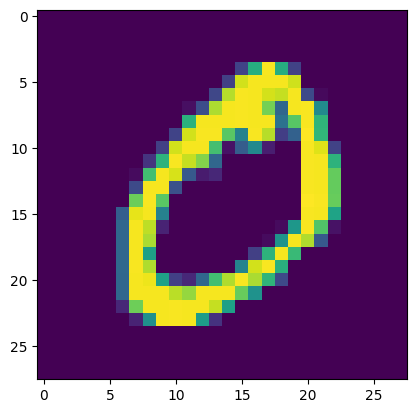

In [11]:
print(plt.imshow(x_train_full[1]))

In [12]:
x_train=x_train_full/255.0
x_test_n=x_test/255.0

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now we have Training and Testing datasets now we have divide the train data into the validation data also 

In [15]:
x_valid,x_train=x_train[:5000],x_train[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [16]:
x_valid.shape,x_train.shape

((5000, 28, 28), (55000, 28, 28))

In [17]:
y_valid.shape,y_train.shape

((5000,), (55000,))

Now we have to create the model using the model from keras 

In [18]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [21]:
model_=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6239 - accuracy: 0.8429 - val_loss: 0.3063 - val_accuracy: 0.9168
Epoch 2/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2893 - accuracy: 0.9166 - val_loss: 0.2376 - val_accuracy: 0.9340
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2361 - accuracy: 0.9325 - val_loss: 0.2043 - val_accuracy: 0.9440
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2016 - accuracy: 0.9421 - val_loss: 0.1792 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1764 - accuracy: 0.9488 - val_loss: 0.1578 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1560 - accuracy: 0.9560 - val_loss: 0.1431 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1400 - accuracy: 0.9604 - val_loss: 0.1345 - val_accur

actually this many epochs actually note needed this model i think overfitted

In [22]:
model_.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
model_.history

{'loss': [0.6239144802093506,
  0.2893066108226776,
  0.23614802956581116,
  0.20155088603496552,
  0.17639046907424927,
  0.1560169905424118,
  0.14004896581172943,
  0.12679094076156616,
  0.11539667844772339,
  0.10585302859544754,
  0.09755465388298035,
  0.08995531499385834,
  0.08334092795848846,
  0.07748038321733475,
  0.0721677765250206,
  0.06721597909927368,
  0.06314144283533096,
  0.058911919593811035,
  0.055060796439647675,
  0.051805850118398666,
  0.0488521046936512,
  0.045634135603904724,
  0.043482083827257156,
  0.04055437073111534,
  0.038323260843753815,
  0.036294177174568176,
  0.03424398973584175,
  0.032542649656534195,
  0.030444500967860222,
  0.029044320806860924],
 'accuracy': [0.8428727388381958,
  0.9166181683540344,
  0.9325090646743774,
  0.9421091079711914,
  0.9488182067871094,
  0.9559636116027832,
  0.9603636264801025,
  0.9644727110862732,
  0.9674727320671082,
  0.9703636169433594,
  0.9724727272987366,
  0.9748908877372742,
  0.9770181775093079

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0705 - accuracy: 0.9787


[0.07046259939670563, 0.9786999821662903]

In [25]:
pred_=model.predict(x_test)
pred_.round(2)

313/313 [==============================] - 1s 3ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)